# きのこの判別

### ≪機械学習の流れ≫
１.データ収集<br>
２.ダミー変数化（カテゴリ特徴量列）<br>
３.テストデータの分離<br>
４.前処理<br>　
 ①欠損値処理<br>　
 ②外れ値の処理<br>　
 ③特徴量の絞り込み<br>　
 ④標準化<br>　
 ⑤多項式特徴量、交互作用特徴量の追加<br>　
 ⑥特徴量と正解データに分割<br>　
 ⑦教師データの分割<br>
５.学習<br>　
 ①未学習状態のモデルの生成<br>　
 ②訓練データで学習<br>
６.評価<br>　
 ①検証データで評価し指標確認<br>　　
⇒OK:最終性能評価（テストデータで評価）<br>　　
⇒NG:改善案検討、前処理に戻る<br>

準備：表形式のデータ構造(`データフレーム`)の処理に特化したライブラリ『**pandas**』をインポートします

In [1]:
# pandasをインポートして別名をpdとする
import pandas as pd

### ≪機械学習の流れ≫　１.データ収集

事前に準備しているCSVファイルを読み込み、pandasを利用してデータフレームを作成します。<br>
読み込み後にデータフレームの先頭5行を表示します。

In [2]:
# mushrooms.csv を読み込みデータフレームを生成 
# ※漢字等がある場合は, （encoding='shift_jis'）を引数に追加
df = pd.read_csv('mushrooms.csv')

# 先頭5行を表示
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### ≪機械学習の流れ≫　２.ダミー変数化（カテゴリ特徴量列）

scikit-learnでは、特徴量には数値の列しか追加できません。<br>
そのため、文字列である列を特徴量に加えたいときには、文字列を数値に変換します。

In [3]:
# dfの「特徴量の列名」を取得
# df.columns
# 上記実行後に下記のプログラムに貼り付け

In [4]:
# 特徴量のみダミー変数化
df2 = pd.get_dummies(df, drop_first=True, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

df2.head(3)

# df2 = pd.get_dummies(df,drop_first = True) 
# 上記プログラムだとデータフレーム全体（正解データを含む）がダミー変数化されるため使用しない

,class,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,poisonous,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,edible,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,edible,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### ≪機械学習の流れ≫　３.テストデータの分離

訓練データ（訓練・検証）とテストデータに分割します。<br>
<br>　
訓練データ：学習に利用するデータ<br>　
検証データ：学習には利用せず、チューニングの参考にするために利用するデータ<br>　
テストデータ：最終的なモデルの予測性能を評価するためだけのデータ

In [5]:
# データの分割で使用する関数をインポート
from sklearn.model_selection import train_test_split

# 訓練（訓練・検証）データとテストデータに分割します。　割合 8:2
train_vol, test_vol = train_test_split(df2, test_size=0.2, random_state=0)

### ≪機械学習の流れ≫　４.前処理　①欠損値処理

欠損値（空欄のデータ）を確認します。<br>
今回は３パータンで確認しています。

In [6]:
# データフレーム全体で欠損値が存在するか確認
train_vol.isnull()

,class,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
7434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7725,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1928,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1653,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# 列単位で欠損値が存在するか確認
train_vol.isnull().any(axis=0)

class                False
cap-shape_conical    False
cap-shape_convex     False
cap-shape_flat       False
cap-shape_knobbed    False
                     ...  
habitat_meadows      False
habitat_paths        False
habitat_urban        False
habitat_waste        False
habitat_woods        False
Length: 96, dtype: bool

In [8]:
# 列単位で欠損値の数を確認
train_vol.isnull().sum()

class                0
cap-shape_conical    0
cap-shape_convex     0
cap-shape_flat       0
cap-shape_knobbed    0
                    ..
habitat_meadows      0
habitat_paths        0
habitat_urban        0
habitat_waste        0
habitat_woods        0
Length: 96, dtype: int64

欠損値が"ない"ことが確認できました。<br>
もし、欠損値があれば、下記のコードを実施します。<br>

データフレーム.fillna(train_vol.mean())

### ４.前処理 ⑥特徴量と正解データに分割

「②外れ値の処理～⑤多項式特徴量、交互作用特徴量の追加」は「６．評価」後に検証します。<br>
１回目の検証を行うために、特徴量と正解データを分割します。

In [9]:
# 特徴量データを抽出
x = train_vol.loc[ : , 'cap-shape_conical':'habitat_woods']

# 正解データを抽出
t = train_vol['class']

### ４.前処理 ⑦教師データの分割

訓練（訓練・検証）データを分割し、訓練データと検証データに分割します。<br>
訓練データで学習し、検証データで評価します。

In [10]:
# 訓練（訓練・検証）データを、訓練データと検証データに分割　割合 8:2
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

### ≪機械学習の流れ≫　５.学習　①未学習状態のモデルの生成

教師あり学習の分類には様々な手法がありますが、今回は「決定木」を使用します。<br>
分析結果が直感的に非常に理解しやすい図であり、分岐条件などを確認しやすいためです。

学習を行う前に、不均衡データ（正解データの比率に差があるか）を確認します。

In [11]:
# 正解データ（class：食用？毒？）の個数を表示
train_vol['class'].value_counts()

edible       3356
poisonous    3143
Name: class, dtype: int64

edibleが約51%、poisonousが約49%のため、不均衡データではないことが分かります。<br>
今回は、引数に「class_weight = 'balanced'」を追加しません。

In [12]:
# treeモジュールをインポート
from sklearn import tree

# 未学習状態のモデルを生成
model = tree.DecisionTreeClassifier(random_state = 0)

### ≪機械学習の流れ≫　５.学習　②訓練データで学習

訓練データで学習を行い、検証データで正解率を計算します。

In [13]:
# モデルの学習
model.fit(x_train, t_train) 

# 正解率を計算
model.score(x_test, t_test)

1.0

検証データの正解率は。。。100%！？<br>
さすがに今までの処理内容のミスを疑いたくなりますので、前処理にミスがないか確認します・・・<br>
間違いはなさそうなので、学習モデルを変更してみます。<br>
<br>
２つ目のモデルは、ランダムフォレストです。<br>
複数のの決定木を作成して、多数決により最終的に１つの予測結果を出す方法となります。

In [14]:
# ランダムフォレスタで使用するモジュールをインポート
from sklearn.ensemble import RandomForestClassifier

# 未学習状態のモデルを生成
model2 = RandomForestClassifier(n_estimators=200, random_state=0)

# モデルの学習
model2.fit(x_train, t_train) 

# 正解率を計算
model2.score(x_test, t_test)

1.0

こちらも正解率が、100％になりました。<br>
予測しやすいデータであることを想定して、評価へ進みます。

### ≪機械学習の流れ≫　６.評価　①検証データで評価し指標確認<br>　　

検証データで100%となったため、「３.テストデータの分離」で行った”テストデータ”を使用して<br>
学習させた決定木モデル（tree.DecisionTreeClassifier）の正解率を計算します。

In [15]:
# テストデータより特徴量を抽出
x2 = test_vol.loc[ : , 'cap-shape_conical':'habitat_woods']

# テストデータより正解データを抽出
t2 = test_vol['class']

# モデルの評価
model.score(x2, t2)

1.0

テストデータでも正答率は100%でした。<br>
今回の「毒 or 食用」は判断しやすいデータだったと判断できます。<br>

最終性能評価（テストデータで検証）が、100％であるため、再学習の必要はありませんが<br>
念のために、木の深さによる変化を確認してみます。

モデルのチューニングは一連の作業の繰り返しなので、それを自動化するlearn関数を定義します。<br>
戻り値は、訓練データの正解率、テストデータの正解率、作成したモデルです。

In [16]:
# 特徴量を抽出
x = df2.loc[ : , 'cap-shape_conical':'habitat_woods']
# 正解データを抽出
t = df2['class']

In [17]:
# x:特徴量　t:正解データ　depth:木の深さ
def learn(x, t, depth):
    x_train, x_test, y_train, y_test = train_test_split(x, t , test_size=0.2, random_state=0)
    model = tree.DecisionTreeClassifier(max_depth = depth, random_state=0)
    model.fit(x_train, y_train)

    # 訓練データの正解率を計算
    score = model.score(x_train, y_train)
    # テストデータの正解率を計算
    score2 = model.score(x_test, y_test)
    # 訓練データのスコア、テストデータのスコア、モデルを返却　※スコアは四捨五入
    return round(score, 3), round(score2, 3), model

In [18]:
for j in range(1,10): # jは木の深さ（1～9が入る）
    train_score, test_score, model = learn(x, t, j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:' + sentence + sentence2
    print(total_sentence.format(j , train_score, test_score))


深さ1:訓練データの正解率0.889テストデータの正解率0.879
深さ2:訓練データの正解率0.954テストデータの正解率0.956
深さ3:訓練データの正解率0.986テストデータの正解率0.983
深さ4:訓練データの正解率0.994テストデータの正解率0.99
深さ5:訓練データの正解率0.997テストデータの正解率0.994
深さ6:訓練データの正解率0.997テストデータの正解率0.994
深さ7:訓練データの正解率1.0テストデータの正解率1.0
深さ8:訓練データの正解率1.0テストデータの正解率1.0
深さ9:訓練データの正解率1.0テストデータの正解率1.0


訓練データの正解率は、「深さ1」で88%を超えており、「深さ7」以降は100%となっています。<br>
テストデータの正解率も同様に「深さ7」以降は100%のため、”過学習”は起きていないことが分かります。

「深さ7」で、決定木分析の分類において、強い影響を与える特徴量であるかを図る『特徴量重要度』を確認します。

In [19]:
import numpy as np

# 深さ7でlearn関数を呼び出し
# train_score, test_score, model = learn(x, t, 7)

x_train, x_test, y_train, y_test = train_test_split(x, t , test_size=0.2, random_state=0)
model = tree.DecisionTreeClassifier(max_depth = 7, random_state=0)
model.fit(x_train, y_train)

# 配列の表示形式を指定（指数表記しない、小数点以下の5桁、末尾がゼロ埋めない）
np.set_printoptions(suppress=True, precision=5, floatmode='maxprec')
# 特徴量重要度を確認
model.feature_importances_



array([0.00061, 0.     , 0.     , 0.     , 0.     , 0.00245, 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.02382, 0.00774, 0.     ,
       0.     , 0.     , 0.62181, 0.     , 0.     , 0.     , 0.00146,
       0.00583, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.16988,
       0.     , 0.     , 0.08727, 0.     , 0.     , 0.     , 0.01478,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.01771, 0.     ,
       0.     , 0.     , 0.03453, 0.     , 0.01031, 0.     , 0.     ,
       0.00181, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     ])

約90個ある項目のうち、分類に使用しているのは15項目程度であると確認できました。<br>
項目名も確認できるように抽出し、特徴量重要度の降順で表示します。

In [20]:
# 特徴量重要度をデータフレームに変換
df3 = pd.DataFrame(model.feature_importances_, index=x_test.columns)

# 降順に整列し表示
df3.sort_values(0, ascending=False)

,0
odor_none,0.621806
stalk-root_club,0.169882
stalk-root_rooted,0.087265
spore-print-color_green,0.034527
odor_anise,0.023817
...,...
gill-color_green,0.000000
gill-color_gray,0.000000
gill-color_chocolate,0.000000
gill-color_buff,0.000000


臭いのn（odor_none）が0.613362、茎の根のc（stalk-root_club）が0.171585になっており<br>
毒か食用の分類に大きな影響を与えていることが確認できました。

「各ノードに到達したデータ数」と「決定木の描画」を行うことで<br>
どういった条件で、どこに何個のデータが到達したかを”視覚的に”確認できます。

In [21]:
# リーフに到達したデータの数を表示
ar = model.tree_.feature

for i in range(len(ar)):
  if ar[i] == -2:
    print("ノード番号{}のデータ数 = {}".format(i, model.tree_.value[i]))


ノード番号6のデータ数 = [[   0. 2934.]]
ノード番号8のデータ数 = [[15.  0.]]
ノード番号9のデータ数 = [[ 0. 77.]]
ノード番号10のデータ数 = [[17.  0.]]
ノード番号11のデータ数 = [[40.  0.]]
ノード番号12のデータ数 = [[156.   0.]]
ノード番号14のデータ数 = [[ 0. 31.]]
ノード番号15のデータ数 = [[394.   0.]]
ノード番号21のデータ数 = [[2564.    0.]]
ノード番号23のデータ数 = [[157.   0.]]
ノード番号24のデータ数 = [[0. 3.]]
ノード番号25のデータ数 = [[0. 1.]]
ノード番号26のデータ数 = [[0. 4.]]
ノード番号28のデータ数 = [[13.  0.]]
ノード番号29のデータ数 = [[ 0. 34.]]
ノード番号30のデータ数 = [[ 0. 59.]]


今回、学習したモデルの「決定木を描画」します。

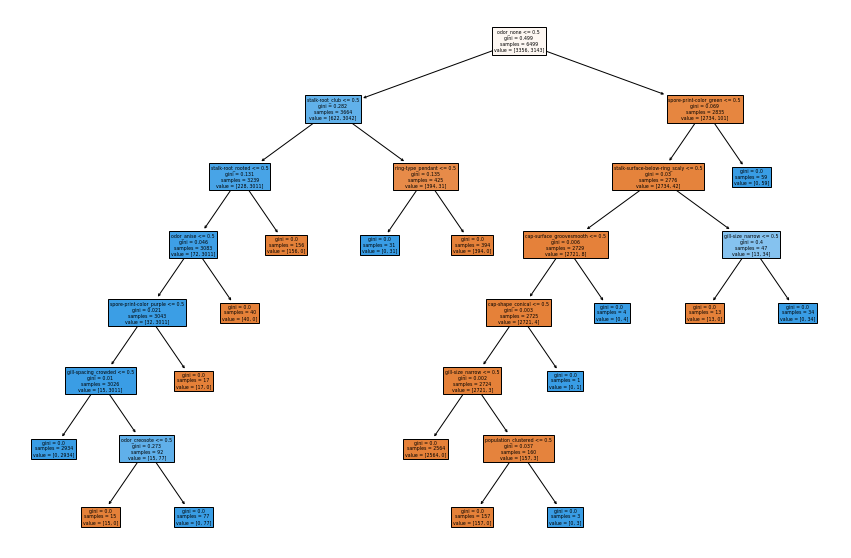

In [22]:
# 描画関数の利用
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# plot_tree関数で決定木を描画
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names = x_train.columns, filled = True)
plt.show()

### モデルを保存して、機械学習が終了です

In [23]:
# pickleのインポート
import pickle

# モデルを保存
with open('mushrooms_model.pkl', 'wb') as f:
    pickle.dump(model, f)
